#### Question 1
#### 1. Calculate the average crime rate for each zip code, and determine the zipcode with highest average crime rate.

In [ ]:
# USUAL SUSPECTS
import numpy as np
# Fixing random state for reproducibility
np.random.seed(19680801)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# SM stuff
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTraining.csv', index_col=[])
df = pd.read_csv('HouseTraining.csv', index_col=[])
df.head()

,Unnamed: 0,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
0,0,8,3672,7364,5.0,5.0,1.0,0.0,8,8.0,4,20104,15332000.0
1,1,6,1743,3893,2.0,2.0,0.0,0.0,33,5.0,8,20140,6411000.0
2,2,8,2242,5199,3.0,3.0,1.0,0.0,34,7.0,6,20182,8931000.0
3,3,8,2257,4699,3.0,3.0,0.0,1.0,42,6.0,5,20182,8662000.0
4,4,8,2436,5200,3.0,3.0,1.0,0.0,70,7.0,6,20182,9098000.0


In [ ]:
#there are five different zipcodes
df.Zipcode.unique()

array([20104, 20140, 20182, 20174, 20119])

In [ ]:
#Use the groupby function to group by zipcode
#then calcualte the mean of each zipcode's crime rate
#finally sort/list the means by smallest to largest
df2 = df.groupby('Zipcode').agg({'Crime_Rate':'mean'}).sort_values(by ='Crime_Rate')
df2

,Crime_Rate
Zipcode,
20104,4.283784
20182,4.500000
20119,4.610390
20174,6.368421
20140,6.511905


In [ ]:
print("The zipcode 20140 has the highest crime rate of 6.5 percent.")

The zipcode 20140 has the highest crime rate of 6.5 percent.


#### 2. Calculate the average house price for each zip code, and determine the zipcode with lowest average house price. Do you see a pattern?

In [ ]:
df3 = df.groupby('Zipcode').agg({'House_Price':'mean'}).sort_values(by ='House_Price')
df3


,House_Price
Zipcode,
20140,1.030618e+07
20174,1.063704e+07
20104,1.083254e+07
20119,1.087213e+07
20182,1.090149e+07


In [ ]:
print("The zipcode 20140 has the lowest average house price of 10306178.\nThere seems to be an inverse relationship between house price and crime rate, as the two zipcodes with a higher relative crime rate also have a lower relative house price.")

The zipcode 20140 has the lowest average house price of 10306178.
There seems to be an inverse relationship between house price and crime rate, as the two zipcodes with a higher relative crime rate also have a lower relative house price.


#### 3. What feature has the strongest correlation with the "School_Rating"?

In [ ]:
df.corr()

,Unnamed: 0,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode,House_Price
Unnamed: 0,1.000000,-0.014608,0.000759,-0.046438,0.013790,0.024150,-0.004329,-0.000087,0.072174,-0.039180,0.000065,-0.081848,-0.021255
School_Rating,-0.014608,1.000000,0.003273,-0.012608,0.005996,0.011234,0.016915,0.001310,-0.114875,0.373675,-0.651958,-0.402891,0.081382
House_Area,0.000759,0.003273,1.000000,0.692192,0.956632,0.864089,0.126806,0.038590,0.003496,-0.001421,0.004005,0.050490,0.927668
Lot_Area,-0.046438,-0.012608,0.692192,1.000000,0.663507,0.628391,0.066005,0.039591,0.003279,0.041527,-0.028160,0.020762,0.875865
Room_No,0.013790,0.005996,0.956632,0.663507,1.000000,0.899354,0.160627,0.058216,-0.012671,0.022116,-0.007340,0.018870,0.892501
Bath_No,0.024150,0.011234,0.864089,0.628391,0.899354,1.000000,0.126592,0.054423,-0.001166,0.006643,-0.015384,-0.007733,0.816760
Garage,-0.004329,0.016915,0.126806,0.066005,0.160627,0.126592,1.000000,-0.003750,-0.048396,0.021130,-0.028996,-0.075111,0.124467
Pool,-0.000087,0.001310,0.038590,0.039591,0.058216,0.054423,-0.003750,1.000000,-0.003237,-0.052538,-0.014438,-0.014279,0.057346
House_Age,0.072174,-0.114875,0.003496,0.003279,-0.012671,-0.001166,-0.048396,-0.003237,1.000000,-0.087509,0.065937,0.102555,-0.016291
Walkability,-0.039180,0.373675,-0.001421,0.041527,0.022116,0.006643,0.021130,-0.052538,-0.087509,1.000000,-0.597465,-0.191964,0.099872


In [ ]:
print("Crime rate has the strongest correlation with school rating.\nIt's negative, which means it's an inverse relationship (when one increases, the other decreases).")

Crime rate has the strongest correlation with school rating.
It's negative, which means it's an inverse relationship (when one increases, the other decreases).


#### 4. Split your dataset into two (training 80%, validation (testing) %20, random_state=1). Build a multiple linear regression model to estimate the house price from all the other features we have and calculate the maximum relative error and R^2.

In [ ]:
X = df.loc[:,['School_Rating', 'House_Area', 'Lot_Area', 'Room_No', 'Bath_No',
        'Garage','Pool','House_Age','Walkability','Crime_Rate','Zipcode']].values
Y = df.loc[:,'House_Price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

##  Linear Regression Fitting 
modelz = LinearRegression()

#fit the model
#modelz.fit(pd.DataFrame(X_train), pd.DataFrame(Y_train))
modelz.fit(X_train, Y_train)

# evaluate the model
#y_test_predict = modelz.predict(pd.DataFrame(X_test))
yhat = modelz.predict(X_test)

## model evaluation
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
max_relative_error = np.amax(np.absolute(Y_test-yhat)/(np.amax(Y_test)-np.amin(Y_test)))
print('max_relative_error (%):', 100*max_relative_error)
#print('Rsquared:',np.corrcoef(Y_test, yhat)[0,1]**2)
r2 = r2_score(Y_test, yhat)
print('Rsquared:',r2)

max_relative_error (%): 8.646444337900347
Rsquared: 0.9774507111556614


In [ ]:
#very similar alternative of using iloc:
#XX = df.iloc[:,:-1].values
#yy = df.iloc[:,-1].values
#X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=1)
# fit the model
#model = LinearRegression()
#model.fit(X_train, y_train)

# evaluate the model
#yhat = model.predict(X_test)
# evaluate predictions
#print('MAE:',mean_absolute_error(y_test, yhat))
#max_relative_error = np.amax(np.absolute(y_test-yhat)/(np.amax(y_test)-np.amin(y_test)))
#print('max_relative_error (%):', 100*max_relative_error)
#print('Rsquared:',np.corrcoef(y_test, yhat)[0,1]**2)

#### 5. Download the new test dataset (https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv), guess the prices of these 10 houses featured in this dataset and print your predictions. Note that this dataset doesn't include "House_Price" column which was given in the training dataset.

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/HouseTest.csv', index_col= 0)
df_test.head() #11 factors 

,School_Rating,House_Area,Lot_Area,Room_No,Bath_No,Garage,Pool,House_Age,Walkability,Crime_Rate,Zipcode
0,8,2030,4715,3.0,2.0,1.0,1.0,48,7.0,4,20166
1,8,1739,5499,2.0,2.0,0.0,1.0,37,8.0,3,20166
2,7,3628,5689,5.0,5.0,1.0,0.0,59,6.0,4,20170
3,4,2019,5441,3.0,2.0,0.0,0.0,2,4.0,8,20124
4,9,2311,6227,3.0,3.0,1.0,0.0,17,8.0,5,20165


In [ ]:
test_info = df_test.to_numpy()

In [ ]:
modelz.predict(test_info)

array([ 8561819.44871832,  8980294.32638028, 12881526.36890043,
        8599287.43466798, 10511332.01790486, 12921742.59768681,
       10019012.08221002, 11708426.88573511, 13117137.55306433,
        6771455.75731301])

#### Question 2
#### 1. Let's replace yes' and no's with 1's and 0's using the factorize() function. Note that factorize() returns two objects: a label array and an array with the unique values. We are only interested in the first object.

In [ ]:
#dfes = pd.read_excel('https://github.com/simsekergun/DATA601/blob/main/2021Fall/datasets/Default.xlsx?raw=true',index_col=[0])
#this also works if you do: pip install openpyxl in terminal
dfe = pd.read_excel('Default.xlsx', index_col=[0])
dfe['default'] = dfe.default.factorize()[0]
dfe['student'] = dfe.student.factorize()[0]
dfe.head()
#Zero means No
#One means Yes

/root/venv/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


#### 1. Plot the histograms of the features in this dataset. What kinds of distributions do you see?

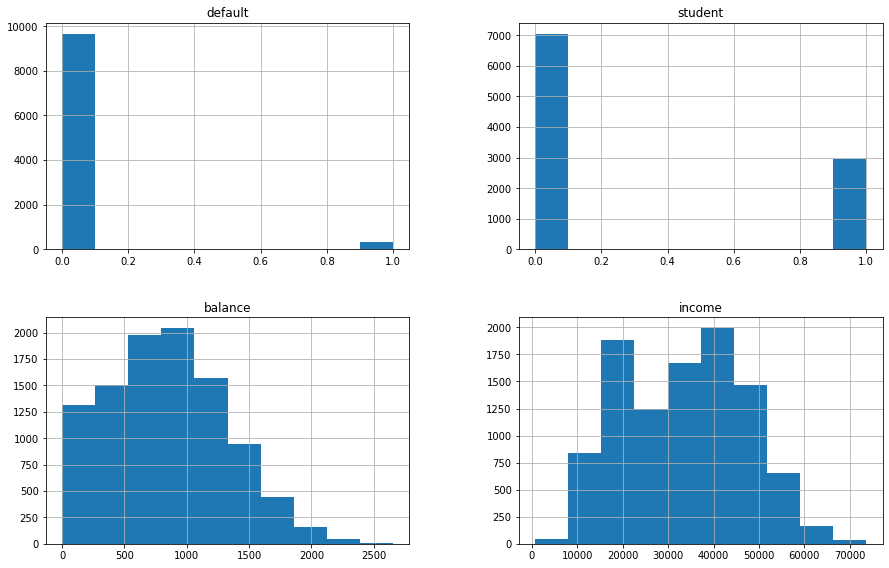

In [ ]:
dfe.hist(layout=(3,2), figsize=(15,15))
plt.show()

In [ ]:
print("I notice the vast majority of people in this dataset do not default,\nthe number of non-students are roughly double the amount of students,\nincome resembles a normal distribution,\nand balance is skewed right (towards zero $).")

I notice the vast majority of people in this dataset do not default,
the number of non-students are roughly double the amount of students,
income resembles a normal distribution,
and balance is skewed right (towards zero $).


#### 2. Boxplot 'default vs balance' and 'default vs income'. Which one has outliers?

<AxesSubplot:title={'center':'balance'}, xlabel='default'>

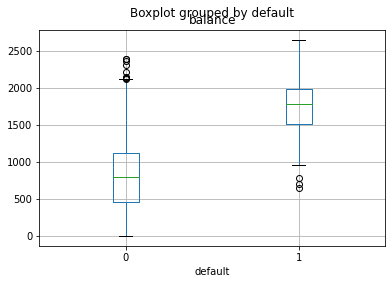

In [ ]:
dfe.boxplot(column=['balance'], by='default')

<AxesSubplot:title={'center':'income'}, xlabel='default'>

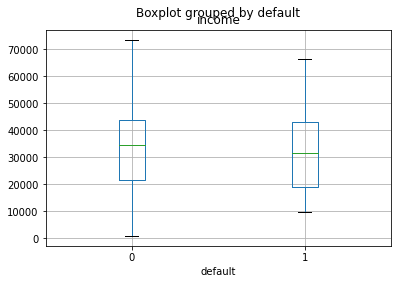

In [ ]:
dfe.boxplot(column=['income'], by='default')

In [ ]:
print("The boxplot 'default vs balance' has outliers.\nFor people who have not defaulted, the outliers are at the higher end of balances (towards 2500)\nand for those who have defaulted, the outliers are at the lower end of balances (towards 500).")

The boxplot 'default vs balance' has outliers.
For people who have not defaulted, the outliers are at the higher end of balances (towards 2500)
and for those who have defaulted, the outliers are at the lower end of balances (towards 500).


#### 3. Split your dataset into two (training 80%, validation (testing) %20, random_state=1). Build a simple logistic regression model to predict default from balance feature only. Create the confusion matric and calculate accuracy, sensitivity, and specificity.

In [ ]:
dflog = dfe.loc[:,('balance','default')]
x = dflog.balance.values
y = dflog.default.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1,1), y_train)

LogisticRegression()

In [ ]:
y_predict = logreg.predict(X_test.reshape(-1,1))

In [ ]:
logreg.score(X_test.reshape(-1,1) , y_test)

0.9745

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

#get total
total1=sum(sum(cm1))
#calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
#calculate sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
#calculate specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1) 

Confusion Matrix : 
 [[1930   11]
 [  40   19]]
Accuracy :  0.9745
Sensitivity :  0.994332818134982
Specificity :  0.3220338983050847


#### 4. Repeat 3. but this time use 'balance','income', and 'student' features to predict the default with a multiple logistic regression model. Create the confusion matric and calculate accuracy, sensitivity, and specificity.

In [ ]:
x = dfe.loc[:,['balance','income','student']].values
y = dfe.loc[:,'default'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.967

In [ ]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
#calculate sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
#calculate specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1924   17]
 [  49   10]]
Accuracy :  0.967
Sensitivity :  0.9912416280267903
Specificity :  0.1694915254237288


#### 5. What does having a high sensitivity and a low specificity mean?
#### Sensitivity is a model's ability to correctly determine true positives. 
#### A test with high sensitivity will identify almost everyone who has the condition, and sometimes return a false negative (people who do in fact have the condition, but tested negative for it). 
#### Specificity is a model's ability to correctly determine true negatives.
#### A test with high specificity will identify almost everyone who doesn't have the condition as not having it, and sometimes return a false positive (people who don't have the condition, but testing positive for it). 
#### In general, the higher the sensitivity, the lower the specificity, and vice versa.
#### So increased sensitivity (a higher true positive rate) usually comes at the expense of reduced specificity (higher false positive rate). 
#### Likewise, increased specificity (higher true negative rate) usually means lower sensitivity (higher false negative rate).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4511c9db-3ff3-4de2-bdfe-cb0da3a697d3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>